1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


In [5]:
import matplotlib.pyplot as plt
import scipy
from scipy.stats import norm
%matplotlib inline

# always useful
import numpy as np

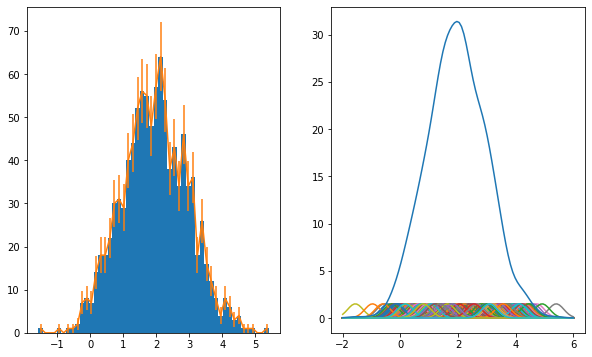

In [2]:
n_bins = 20
sigma = 1
mu = 2
x = sigma**(2)*np.random.randn(1000)+mu


fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,6))
y, bins, patches = ax1.hist(x, 50)
bincenters = 0.5*(bins[1:]+bins[:-1])
ax1.set_ylabel("")
ax1.errorbar(bincenters, y, yerr=np.sqrt(y))
#fig.tight_layout()

gaussians = []
mixture = None
space = np.linspace(mu-4*sigma, mu+4*sigma, 100)
for i in range(len(x)):
    gaussian = norm(loc=x[i],scale=1.06*sigma**(2)*(len(x)**(-0.2)))
    gaussians.append(gaussian)
    ax2.plot(space, gaussian.pdf(space))
    try:
        mixture +=gaussian.pdf(space)
    except:
        mixture =gaussian.pdf(space)
    
ax2.plot(space, mixture*(scipy.integrate.trapz(y)/scipy.integrate.trapz(mixture)))


2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

--2020-11-19 15:22:02--  https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Risoluzione di www.dropbox.com (www.dropbox.com)... 162.125.69.1, 2620:100:6025:1::a27d:4501
Connessione a www.dropbox.com (www.dropbox.com)|162.125.69.1|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 301 Moved Permanently
Posizione: /s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png [segue]
--2020-11-19 15:22:03--  https://www.dropbox.com/s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Riutilizzo della connessione esistente a www.dropbox.com:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://uc5e8a01d0a9387bb917d986c829.dl.dropboxusercontent.com/cd/0/inline/BDdoTeaNOBrc_doeaGlHAmf3-ZtKfGbcMHTwyrNOLpgIX3FsZOfoSovRhZuwd3Q4oHlUGJw3v4Gcv0GW6bkT8XckIGmiySV4wtuC4BsFjiaAhA/file# [segue]
--2020-11-19 15:22:03--  https://uc5e8a01d0a9387bb917d986c829.dl.dropboxusercontent.com/cd/0/inline/BDdoTeaNOBrc_doeaGlHAmf3-ZtKfGbcMHTwyrNOLpgIX3FsZ

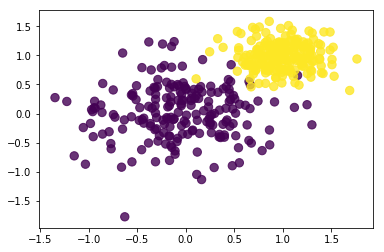

In [3]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

[0 1 2]


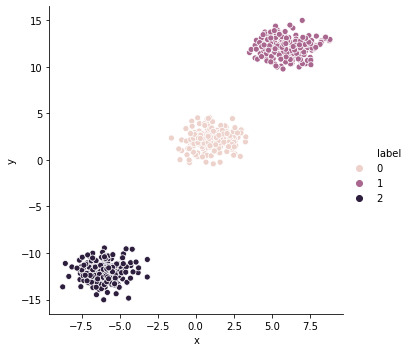

In [7]:
import pandas as pd 
import seaborn as sns

mean = [(1, 2),(6, 12),(-6, -12)]
cov = [[[1, 0], [0, 1]], [[1, 0], [0, 1]],[[1, 0], [0, 1]]]
def gendata(mean, cov):
    data = np.random.multivariate_normal(mean[0], cov[0],200)
    df2 = pd.DataFrame(data, columns=["x","y"])
    df2['label'] = np.zeros(len(df2))
    df = pd.DataFrame(df2,columns=["x","y","label"])
    dataframes = []
    for i in range(1,len(mean)):
        data = np.random.multivariate_normal(mean[i], cov[i],200)
        df3 = pd.DataFrame(data, columns=["x","y"])
        df3['label'] = i*np.ones(len(df3))
        dataframes.append(df3)
        
    lista = []
    lista.append(df)
    for i in range(len(dataframes)):
        lista.append(dataframes[i])
    dataframe = pd.concat(lista,ignore_index=True)
    return dataframe
df = gendata(mean,cov).astype({'label': 'int32'})
print(df['label'].unique())
sns.relplot(x="x", y="y", hue="label", data=df);

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [22]:
!wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy

--2020-11-19 17:00:13--  https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
Risoluzione di www.dropbox.com (www.dropbox.com)... 162.125.69.1, 2620:100:6025:1::a27d:4501
Connessione a www.dropbox.com (www.dropbox.com)|162.125.69.1|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 301 Moved Permanently
Posizione: /s/raw/hgnvyj9abatk8g6/residuals_261.npy [segue]
--2020-11-19 17:00:15--  https://www.dropbox.com/s/raw/hgnvyj9abatk8g6/residuals_261.npy
Riutilizzo della connessione esistente a www.dropbox.com:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://uc2df98d5da19904865102f55e97.dl.dropboxusercontent.com/cd/0/inline/BDhOqzK8sbq6a7OFHSP86NARbCgTzx5-o4MDyW8515xAYxhTsjAu6v7KbAEIoVtxaIq6NPJQFjYnd-02vWJZWQqVJrTIygeAeXLkWh3VnMtdaw/file# [segue]
--2020-11-19 17:00:16--  https://uc2df98d5da19904865102f55e97.dl.dropboxusercontent.com/cd/0/inline/BDhOqzK8sbq6a7OFHSP86NARbCgTzx5-o4MDyW8515xAYxhTsjAu6v7KbAEIoVtxaIq6NPJQFjYnd-02vWJZWQqVJrT

In [8]:
from scipy import stats

numpy_data = np.load("residuals_261.npy",allow_pickle=True)
df = pd.DataFrame(numpy_data.item())
df = df.drop(df.index[np.where(np.abs(df['residuals'])>2)])
df

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
8,-0.042857,3.3
9,0.128571,5.3
10,0.085714,15.0
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


slope: 0.577792    intercept: 10.025256


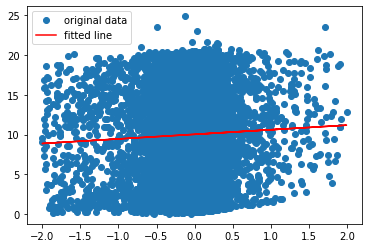

<ErrorbarContainer object of 3 artists>

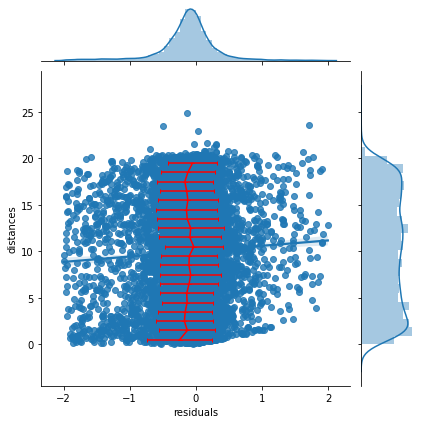

In [9]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df['residuals'],df['distances'])
print("slope: %f    intercept: %f" % (slope, intercept))
plt.plot(df['residuals'],df['distances'],'o', label='original data')
plt.plot(df['residuals'], intercept + slope*df['residuals'], 'r', label='fitted line')
plt.legend()
plt.show()
g = sns.jointplot("residuals", "distances", data=df, kind="reg")
nrbins = 20
_,bins = np.histogram(df['distances'],nrbins, range=[0,20])
x = 0.5*(bins[1:]+bins[:-1])
y = []
erry = []
bound = x[0]

for i in x:
    y.append(np.mean(df[(df['distances']<i+bound) & (df['distances']>i-bound)]['residuals']))
    erry.append(np.std(df[(df['distances']<i+bound) & (df['distances']>i-bound)]['residuals']))
plt.errorbar(y, x,0,erry, fmt='r', capsize=2)